Key Business Questions for Analysis:


1.   Top Performing Products by Channel and Profitability
*   Which products are sold the most by each sales method (online vs in-store)
*   Which product categories contribute the most to operating profit?
*   How do product sales and profits vary across different departments or regions?

2.   Retail Sales Performance
*   Which retailer generates the highest and lowest total sales?
*   How does each retailer perform in terms of operating profit and sales volume?

3.   Geographic Sales Insights
*   Which states and cities generate the highest total sales?
*   Are there specific regions that consistently outperform others in terms of sales or profitability? (Which retailers dominate in different regions?)

4.   Category-Specific Performance
*   Which cities have the highest sales for Women’s Street Footwear and Women’s Apparel?

5.   Seasonality & Trends
*   Are there seasonal patterns in total sales and product performance??

6.   Sales Efficiency
*   What is the average price per unit sold per category?

In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
#enable inline plotting
%matplotlib inline
import numpy as np
import requests
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
#read the csv file for further data manipulation
df=pd.read_csv('/content/sample_data/data_sales (1).csv')

In [4]:
df.isnull().sum() #make sure there are no null values

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,2
Units Sold,0
Total Sales,0


In [5]:
df.dropna(inplace=True) #drop rows with null values
display(df)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,$65.00,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,$65.00,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,$75.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,$65.00,150,"9,750","$2,925",In-store


In [6]:
null_summary = df.isna().sum()
df.rename(columns={'Retailer ID':'Retailer_ID', 'Invoice Date': 'Invoice_Date', 'Price per Unit': 'Price_per_unit', 'Units Sold': 'Units_Sold', 'Total Sales': 'Total_Sales', 'Operating Profit': 'Operating_Profit', 'Sales Method': 'Sales_Method'}, inplace=True) #rename ambiguous columns
print(null_summary)

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64


In [7]:
print(df.dtypes) #printing data types

Retailer            object
Retailer_ID          int64
Invoice_Date        object
Region              object
State               object
City                object
Product             object
Price_per_unit      object
Units_Sold          object
Total_Sales         object
Operating_Profit    object
Sales_Method        object
dtype: object


In [8]:
# Convert to datetime and extract year
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])

# Clean and convert numeric columns
numeric_cols = ['Price_per_unit', 'Units_Sold', 'Total_Sales', 'Operating_Profit']
for col in numeric_cols:
    # Remove any non-numeric characters (e.g., $, commas)
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

In [9]:
for col in ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales_Method']:
    df[col] = df[col].astype('category')



# 1. Top Performing Products by Channel and Profitability

Which products are sold the most by each sales method (online vs in-store):



<ipython-input-10-d5b81cb2b015>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_sales_by_method = df.groupby(['Product', 'Sales_Method'])['Units_Sold'].sum().reset_index()


Sales_Method               In-store    Online    Outlet
Product                                                
Men's Street Footwear      176030.0  225121.0  192169.0
Men's Athletic Footwear    117150.0  163855.0  153446.0
Women's Apparel            120500.0  163937.0  148690.0
Women's Street Footwear    105485.0  147659.0  138300.0
Women's Athletic Footwear   85450.0  120755.0  110931.0
Men's Apparel               85375.0  117766.0  100742.0
Men's aparel                    0.0       0.0     900.0


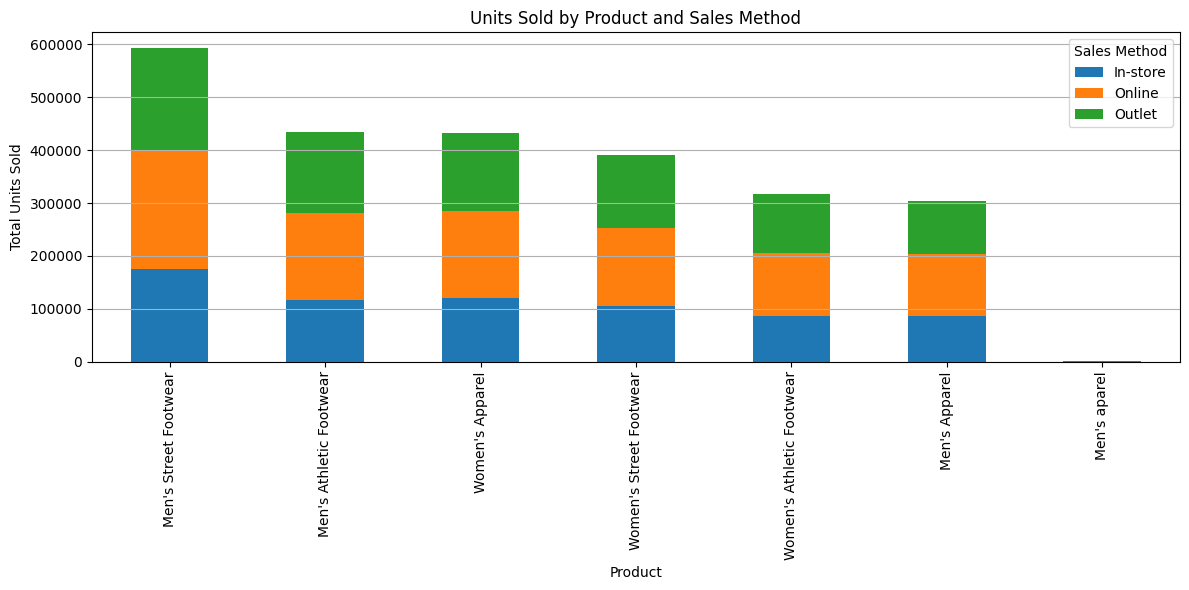

In [10]:
#Which products are sold the most by each sales method (online vs in-store)

# Group by year and payment methods
product_sales_by_method = df.groupby(['Product', 'Sales_Method'])['Units_Sold'].sum().reset_index()

# Pivot to compare side by side
product_pivot = product_sales_by_method.pivot(index='Product', columns='Sales_Method', values='Units_Sold').fillna(0)

# Sort products by total units sold (descending order)
sorted_products = product_pivot.sum(axis=1).sort_values(ascending=False).index
product_pivot = product_pivot.loc[sorted_products]

# Print table
print("Which products are sold the most by each sales method (online vs in-store):\n")
print(product_pivot)

# Plot stacked bar chart
product_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Units Sold by Product and Sales Method")
plt.xlabel("Product")
plt.ylabel("Total Units Sold")
plt.legend(title="Sales Method")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Which product categories contribute the most to operating profit?

<ipython-input-11-ab15f26bc075>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_product = df.groupby('Product')['Operating_Profit'].sum().sort_values(ascending=False)


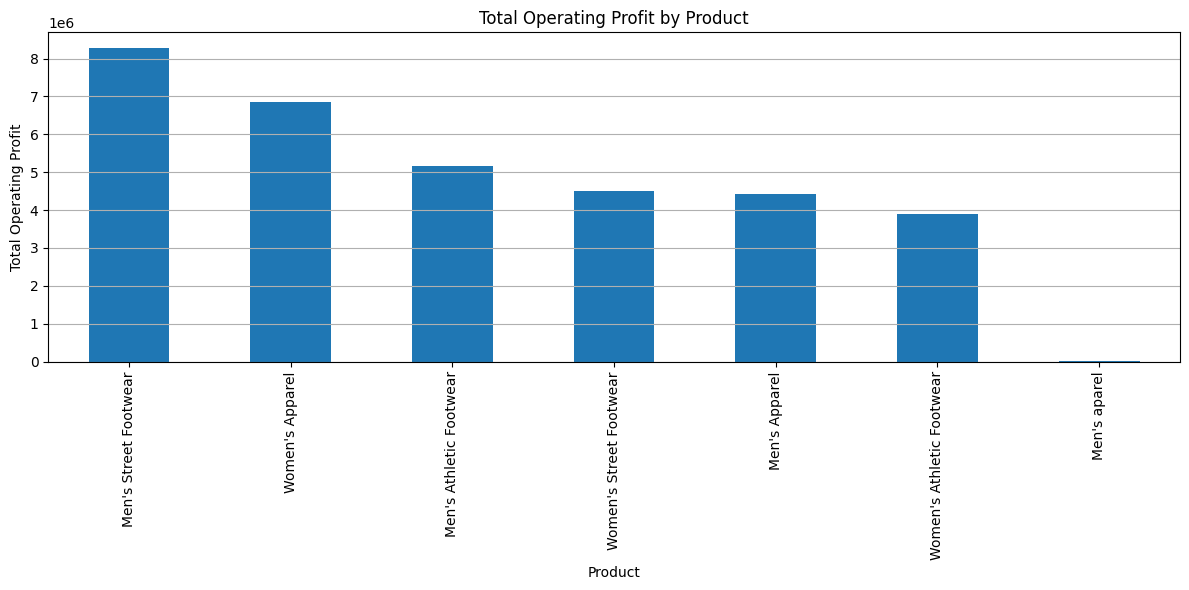

In [11]:
# Group by Product and sum Operating Profit
profit_by_product = df.groupby('Product')['Operating_Profit'].sum().sort_values(ascending=False)

# Plot
profit_by_product.plot(kind='bar', figsize=(12,6), title='Total Operating Profit by Product')
plt.ylabel('Total Operating Profit')
plt.xlabel('Product')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

How do product sales and profits vary across different departments or regions?

<ipython-input-12-297a3126707b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales_profit = df.groupby(['Region', 'Product'])[['Units_Sold', 'Operating_Profit']].sum().reset_index()


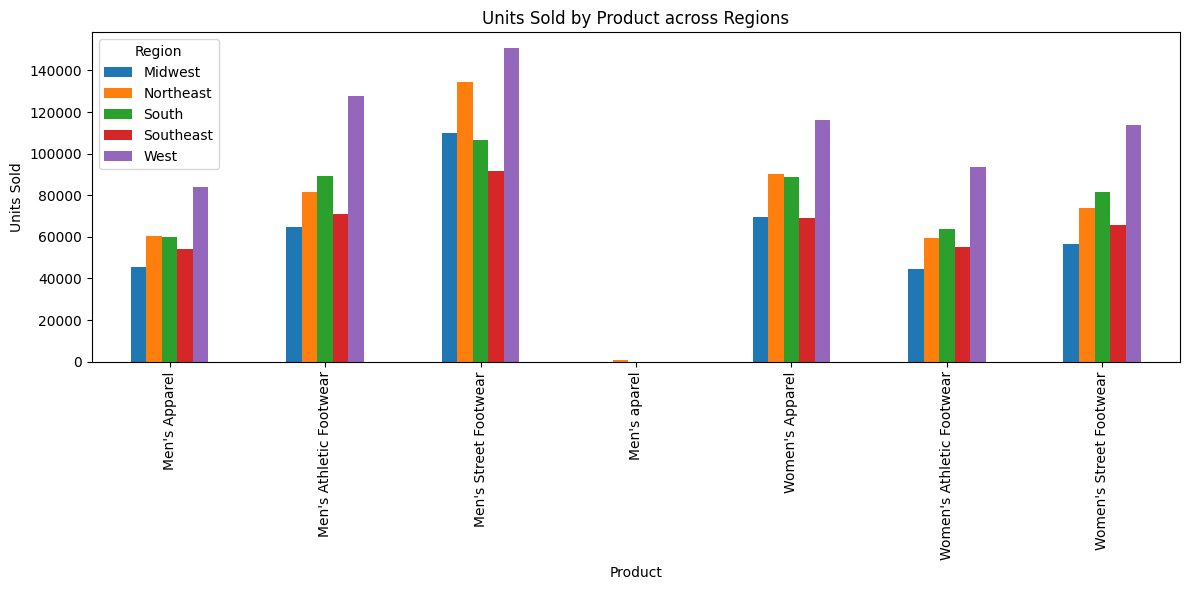

In [12]:
# Group by Region and Product
region_sales_profit = df.groupby(['Region', 'Product'])[['Units_Sold', 'Operating_Profit']].sum().reset_index()

# Pivot for visualization (example for Units Sold)
pivot_units = region_sales_profit.pivot(index='Product', columns='Region', values='Units_Sold').fillna(0)

# Plot
pivot_units.plot(kind='bar', figsize=(12,6), title='Units Sold by Product across Regions')
plt.ylabel('Units Sold')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

In [13]:
# Export for Tableau Topics
# Question 1
product_pivot.to_csv('/content/sample_data/product_sales_by_method.csv')
# Question 2
profit_by_product.to_frame().to_csv('/content/sample_data/profit_by_product.csv')
# Question 3
pivot_units.to_csv('/content/sample_data/units_by_product_region.csv')

In [14]:
# Save into one file for Tableau prep
# Flatten pivot data
product_pivot_flat = product_pivot.reset_index().melt(id_vars='Product', var_name='Sales_Method', value_name='Units_Sold')

# Add Operating Profit
profit_df = profit_by_product.to_frame().reset_index().rename(columns={'Operating_Profit': 'Total_Operating_Profit'})

# Merge with units sold by method
combined = pd.merge(product_pivot_flat, profit_df, on='Product', how='left')

# Add Region breakdown
pivot_units_flat = pivot_units.reset_index().melt(id_vars='Product', var_name='Region', value_name='Units_Sold_by_Region')
combined = pd.merge(combined, pivot_units_flat, on='Product', how='left')

# Export one unified CSV
combined.to_csv('/content/sample_data/topic1_product_analysis_combined.csv', index=False)

# 2. Retail Sales Performance using Seaborn

In [15]:
#customize palette and style (for seaborn)
sns.set_style('whitegrid')
sns.set_palette("Set1")

<ipython-input-16-424a65d4895b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='Retailer', y='Total_Sales', data=df.groupby('Retailer')['Total_Sales'].sum().reset_index())


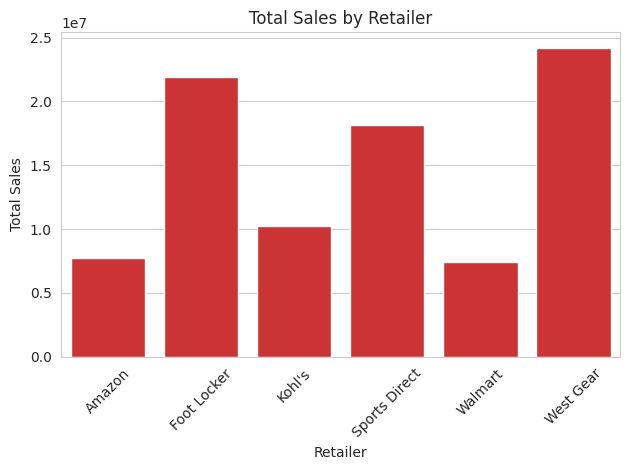

In [16]:
# Which retailer generates the highest and lowest total sales?
sns.barplot(x='Retailer', y='Total_Sales', data=df.groupby('Retailer')['Total_Sales'].sum().reset_index())
#sns.set_style('whitegrid')
#sns.set_palette('pastel')
plt.title('Total Sales by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
from bokeh.io import output_notebook
output_notebook()

How does each retailer perform in terms of operating profit and sales volume?
using Bokeh

In [18]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import dodge
from bokeh.models import NumeralTickFormatter

# Group by Retailer and calculate total units sold (sales volume) and operating profit
retailer_summary = df.groupby('Retailer')[['Units_Sold', 'Operating_Profit']].sum().reset_index()

# Sort by Units Sold for viewing
retailer_performance = retailer_summary.sort_values(by='Units_Sold', ascending=False)

source=ColumnDataSource(retailer_performance)

# Create a figure
fig = figure(
    x_range=list(retailer_performance['Retailer']),
    x_axis_label='Retailers',
    y_axis_label='Units Sold',
    height=400,
    width=800,
    title='Retailer Sales Volume (Units Sold)'
)

fig.vbar(x='Retailer', top='Units_Sold', width=0.5, source=source, color='blue', legend_label='Units Sold')
#hbar=fig.hbar(y=dodge('Retailer', -0.25, range=fig.y_range), right='Operating_Profit', height=0.2, source=source, color='green', legend_label='Operating Profit')

hover = HoverTool(tooltips=[
    ("Retailer", "@Retailer"),
    ("Units Sold", "@Units_Sold{0,0}"),
    ("Operating Profit", "@Operating_Profit{$0,0.00}")
])
fig.ygrid.grid_line_dash = 'dotted'
fig.ygrid.grid_line_color = 'gray'
fig.add_tools(hover)

fig.legend.title = 'Metrics'
fig.legend.location = 'top_left'
fig.yaxis.formatter = NumeralTickFormatter(format="0,0")
fig.xaxis.major_label_orientation = 1

output_file('retailer_performance.html')
show(fig)





<ipython-input-18-bb990f8d5e9f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retailer_summary = df.groupby('Retailer')[['Units_Sold', 'Operating_Profit']].sum().reset_index()


In [35]:
# Export for Tableau Topics
# Group and save to CSV for Tableau
retailer_sales = df.groupby('Retailer')['Total_Sales'].sum().reset_index()
retailer_sales.to_csv('/content/sample_data/retailer_total_sales.csv', index=False)
# Group and save to CSV for Tableau
retailer_summary = df.groupby('Retailer')[['Units_Sold', 'Operating_Profit']].sum().reset_index()
retailer_summary.to_csv('/content/sample_data/retailer_sales_volume_profit.csv', index=False)

<ipython-input-35-554aaa32b9ce>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retailer_sales = df.groupby('Retailer')['Total_Sales'].sum().reset_index()
<ipython-input-35-554aaa32b9ce>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retailer_summary = df.groupby('Retailer')[['Units_Sold', 'Operating_Profit']].sum().reset_index()


In [ ]:
# Export for Tableau Topics

# 3. Geographic Sales Insights - horizontal bar chart bokeh

In [19]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter

# Group ONLY by state for total sales
geographic_sales = df.groupby('State')['Total_Sales'].sum().reset_index()

# Sort by sales (optional for better visual)
geographic_sales = geographic_sales.sort_values(by='Total_Sales', ascending=False)

# Create data source
source = ColumnDataSource(geographic_sales)

# Create a figure with state names as categories
fig = figure(
    x_range=list(geographic_sales['State']),
    x_axis_label='State',
    y_axis_label='Total Sales',
    height=400,
    width=900,
    title='Total Sales by State'
)

# Plot bars
fig.vbar(x='State', top='Total_Sales', width=0.5, source=source, color='steelblue', legend_label='Total Sales')

# Add hover tool
hover = HoverTool(tooltips=[
    ("State", "@State"),
    ("Total Sales", "@Total_Sales{$0,0.00}")
])
fig.add_tools(hover)

# Formatting
fig.ygrid.grid_line_dash = 'dotted'
fig.ygrid.grid_line_color = 'gray'
fig.yaxis.formatter = NumeralTickFormatter(format="0,0")
fig.xaxis.major_label_orientation = 1
fig.legend.title = 'Metric'
fig.legend.location = 'top_left'

# Output
output_file('geographic_sales.html')
show(fig)


<ipython-input-19-49737c300072>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  geographic_sales = df.groupby('State')['Total_Sales'].sum().reset_index()


Which retailers dominate in different regions?

In [20]:
from bokeh.layouts import column
from bokeh.models import Dropdown
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter

# Group by Region and Retailer
region_sales = df.groupby(['Region', 'Retailer'])['Total_Sales'].sum().reset_index()
region_sales = region_sales.sort_values(by='Total_Sales', ascending=False)

# Create data source
source = ColumnDataSource(region_sales)

# Figure setup
fig = figure(
    x_range=list(region_sales['Region'].unique()),
    x_axis_label='Region',
    y_axis_label='Total Sales',
    height=400,
    width=800,
    title='Total Sales by Region'
)

fig.vbar(x='Region', top='Total_Sales', width=0.5, source=source, color='blue', legend_label='Total Sales')

# Hover tool
hover = HoverTool(tooltips=[
    ("Region", "@Region"),
    ("Retailer", "@Retailer"),
    ("Total Sales", "@Total_Sales{$0,0.00}")
])
fig.add_tools(hover)

# Format
fig.ygrid.grid_line_dash = 'dotted'
fig.ygrid.grid_line_color = 'gray'
fig.yaxis.formatter = NumeralTickFormatter(format="0,0")
fig.xaxis.major_label_orientation = 1
fig.legend.title = 'Metrics'
fig.legend.location = 'top_left'

# Dropdown (just shown for now, not functional)
from bokeh.models import Select
dropdown = Select(title="Retailer", value="All", options=["All"] + list(df['Retailer'].unique()))

# Layout and show
from bokeh.layouts import column
output_file('region_sales.html')
show(column(dropdown, fig))


<ipython-input-20-c613f8e17b3c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales = df.groupby(['Region', 'Retailer'])['Total_Sales'].sum().reset_index()


In [36]:
# Group by state for total sales
geographic_sales = df.groupby('State')['Total_Sales'].sum().reset_index()

# Save to CSV for Tableau
geographic_sales.to_csv('/content/sample_data/state_total_sales.csv', index=False)
# Group by Region and Retailer
region_sales = df.groupby(['Region', 'Retailer'])['Total_Sales'].sum().reset_index()

# Save to CSV for Tableau
region_sales.to_csv('/content/sample_data/region_retailer_sales.csv', index=False)

<ipython-input-36-13bc41eef030>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  geographic_sales = df.groupby('State')['Total_Sales'].sum().reset_index()
<ipython-input-36-13bc41eef030>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sales = df.groupby(['Region', 'Retailer'])['Total_Sales'].sum().reset_index()


# 4. Category-Specific Trends - seaborn

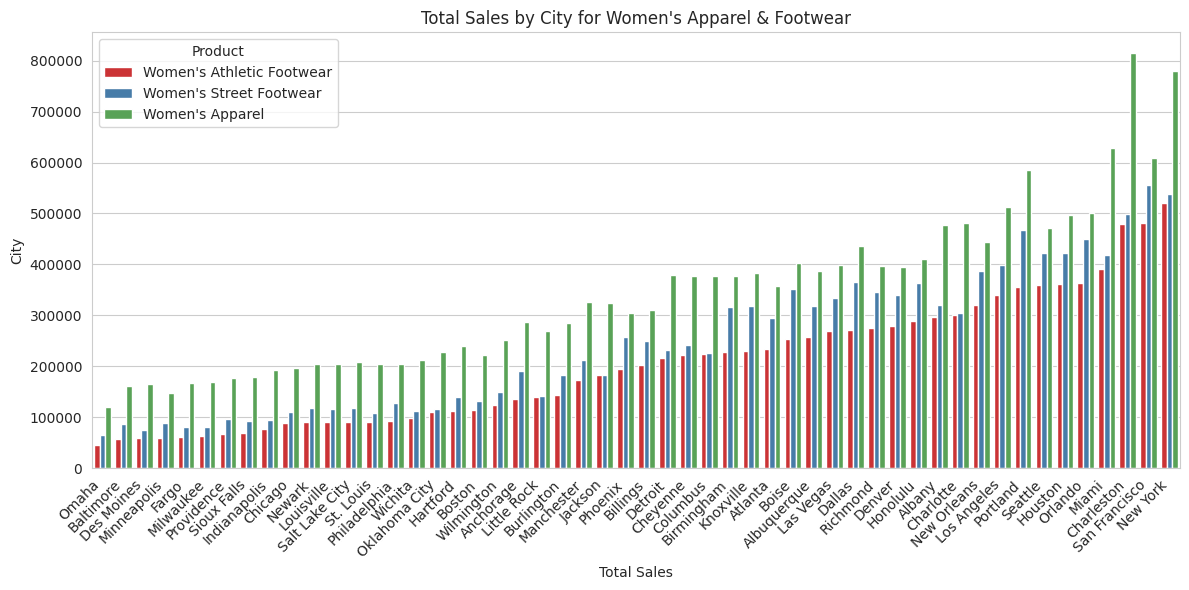

In [21]:
# Clean product names to avoid hidden issues
df['Product'] = df['Product'].str.strip()
df['City'] = df['City'].str.strip()

# Ensure Total_Sales is numeric
#df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], errors='coerce')

# Step 1: Filter products
products_of_interest = ["Women's Street Footwear", "Women's Athletic Footwear", "Women's Apparel"]
filtered = df[df['Product'].isin(products_of_interest)]

# Step 2: Group and aggregate
grouped = filtered.groupby(['City', 'Product'])['Total_Sales'].sum().reset_index()

# Step 3: Sort by total sales
sorted_grouped = grouped.sort_values(by='Total_Sales', ascending=True)

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total_Sales', data=sorted_grouped, hue='Product')
plt.title("Total Sales by City for Women's Apparel & Footwear")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.tight_layout()
plt.show()

<ipython-input-22-2f6806434e43>:5: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension()


Column
    [0] Markdown(str)
    [1] MultiSelect(name='Select Product(s)', options=["Women's Street Footwear"...], size=3, value=["Women's Street Footwear"...])
    [2] ParamFunction(function, _pane=Matplotlib, defer_load=False)
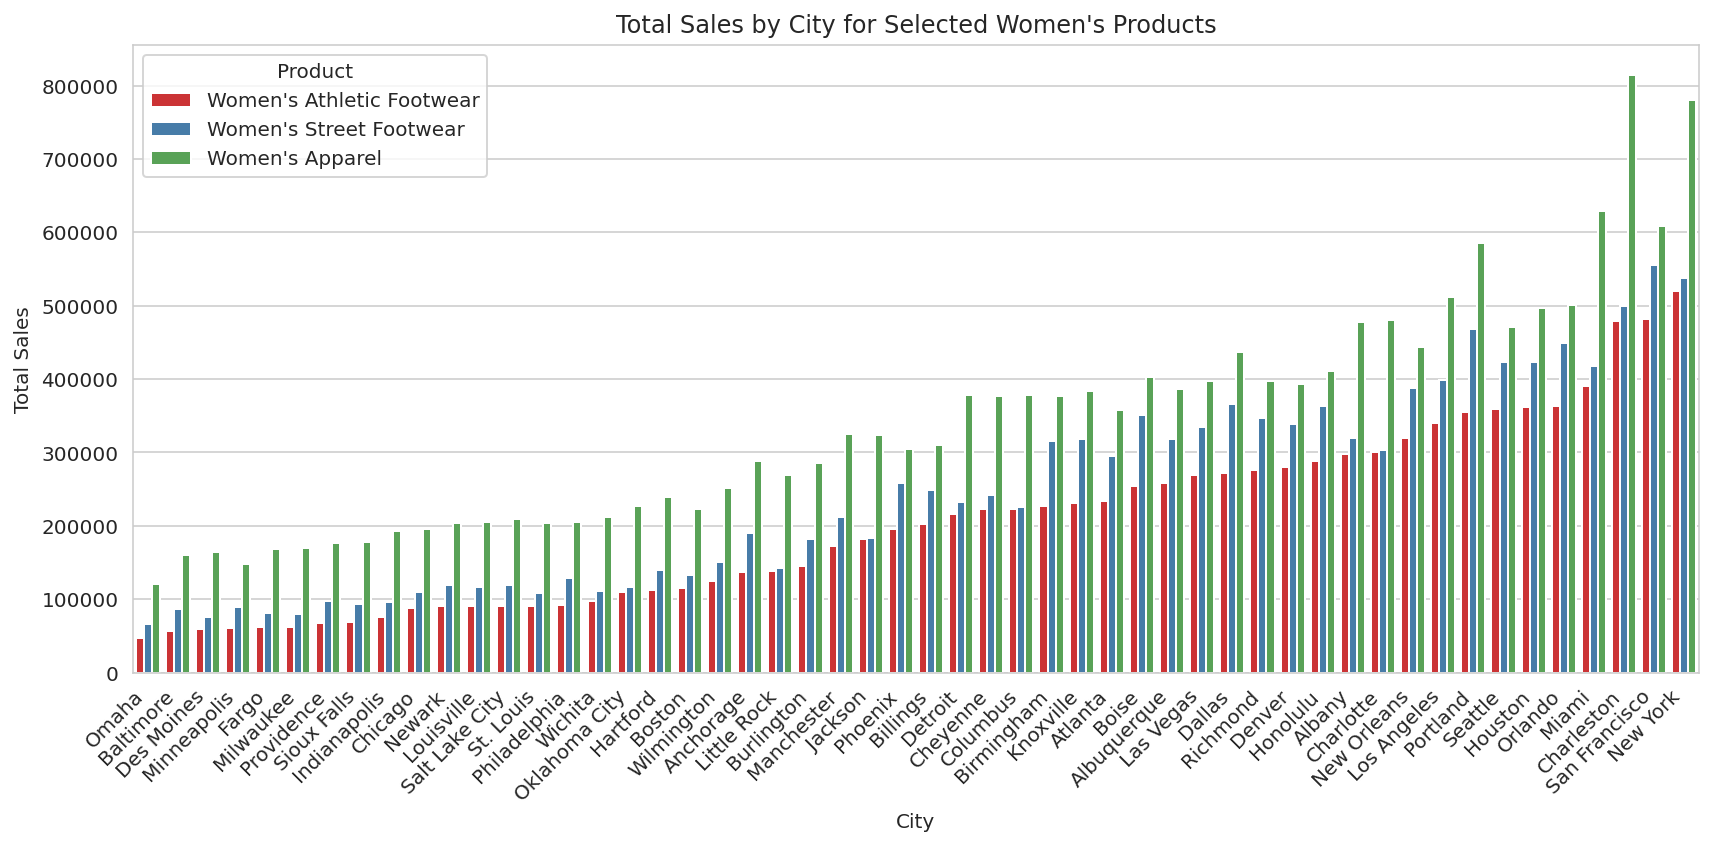

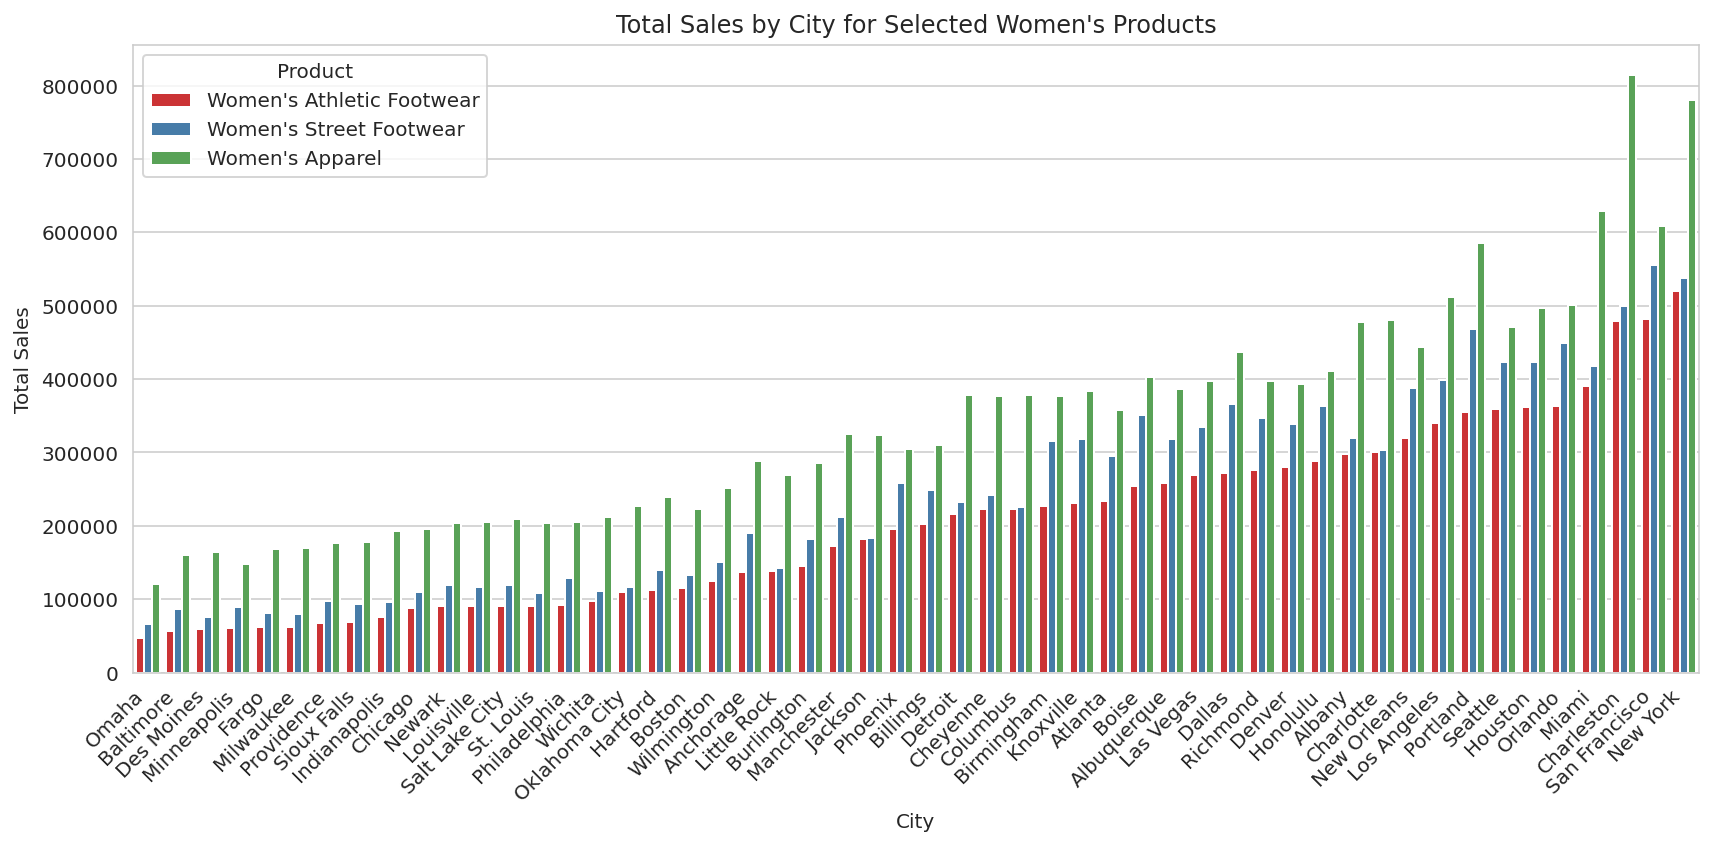

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

# ---- Step 0: Prepare Data ----

# Clean and preprocess
df['Product'] = df['Product'].str.strip()
df['City'] = df['City'].str.strip()
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], errors='coerce')

# Define product categories
products_of_interest = [
    "Women's Street Footwear",
    "Women's Athletic Footwear",
    "Women's Apparel"
]

# Filter data for relevant products
filtered_df = df[df['Product'].isin(products_of_interest)]

# ---- Step 1: Create interactive Panel app ----

# Widget: dropdown for product
product_selector = pn.widgets.MultiSelect(
    name='Select Product(s)',
    options=products_of_interest,
    value=products_of_interest,
    size=3
)

# ---- Step 2: Plot function ----

def plot_sales_by_city(selected_products):
    # Filter
    filtered = filtered_df[filtered_df['Product'].isin(selected_products)]

    # Group and aggregate
    grouped = filtered.groupby(['City', 'Product'])['Total_Sales'].sum().reset_index()

    # Sort by total sales
    grouped = grouped.sort_values(by='Total_Sales', ascending=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='City', y='Total_Sales', data=grouped, hue='Product')
    plt.title("Total Sales by City for Selected Women's Products")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("City")
    plt.ylabel("Total Sales")
    plt.tight_layout()

    return pn.pane.Matplotlib(plt.gcf(), tight=True)

# ---- Step 3: Link widget to function ----

@pn.depends(product_selector)
def reactive_plot(products):
    return plot_sales_by_city(products)

# ---- Step 4: Layout and serve ----

layout = pn.Column(
    "# Women's Product Sales by City",
    product_selector,
    reactive_plot
)

layout.servable()  # For `panel serve` OR run layout.show() for inline preview

In [37]:
# Export grouped and sorted data
sorted_grouped.to_csv('/content/sample_data/city_womens_category_sales.csv', index=False)

#  5. Seasonality - **seaborn

In [32]:
# Are there seasonal patterns in total sales and product performance?

# Create dropdown widget
retailers = list(df['Retailer'].unique())
retailer_select = pn.widgets.Select(name='Retailer', options=['All'] + retailers, value='All')

@pn.depends(retailer_select)
def plot_retailer_sales(selected_retailer):
    # Filter data
    if selected_retailer == 'All':
        data = df.copy()
    else:
        data = df[df['Retailer'] == selected_retailer]

    # Group by month
    monthly_sales = data.groupby('Month_Year')['Total_Sales'].sum().reset_index()
    monthly_sales = monthly_sales.sort_values(by='Month_Year')

    source = ColumnDataSource(monthly_sales)

    # Create figure
    fig = figure(
        x_axis_type='datetime',
        title=f'Total Sales Over Time - {selected_retailer}',
        height=400,
        x_axis_label='Month-Year',
        y_axis_label='Total Sales'
    )

    fig.line(x='Month_Year', y='Total_Sales', source=source, line_width=2, color='blue')

    hover = HoverTool(tooltips=[
        ("Month", "@Month_Year{%b %Y}"),
        ("Total Sales", "@Total_Sales{$0,0.00}")
    ], formatters={'@Month_Year': 'datetime'})

    fig.add_tools(hover)
    fig.yaxis.formatter = NumeralTickFormatter(format="0,0")

    return fig

from bokeh.plotting import output_file, save

# Generate the plot by calling the function directly
fig = plot_retailer_sales('All')  # or use a specific retailer like 'Retailer A'

# Output as interactive HTML file
output_file('monthly_sales_by_retailer.html')
save(fig)  # ← saves the figure to the HTML file

'/content/monthly_sales_by_retailer.html'

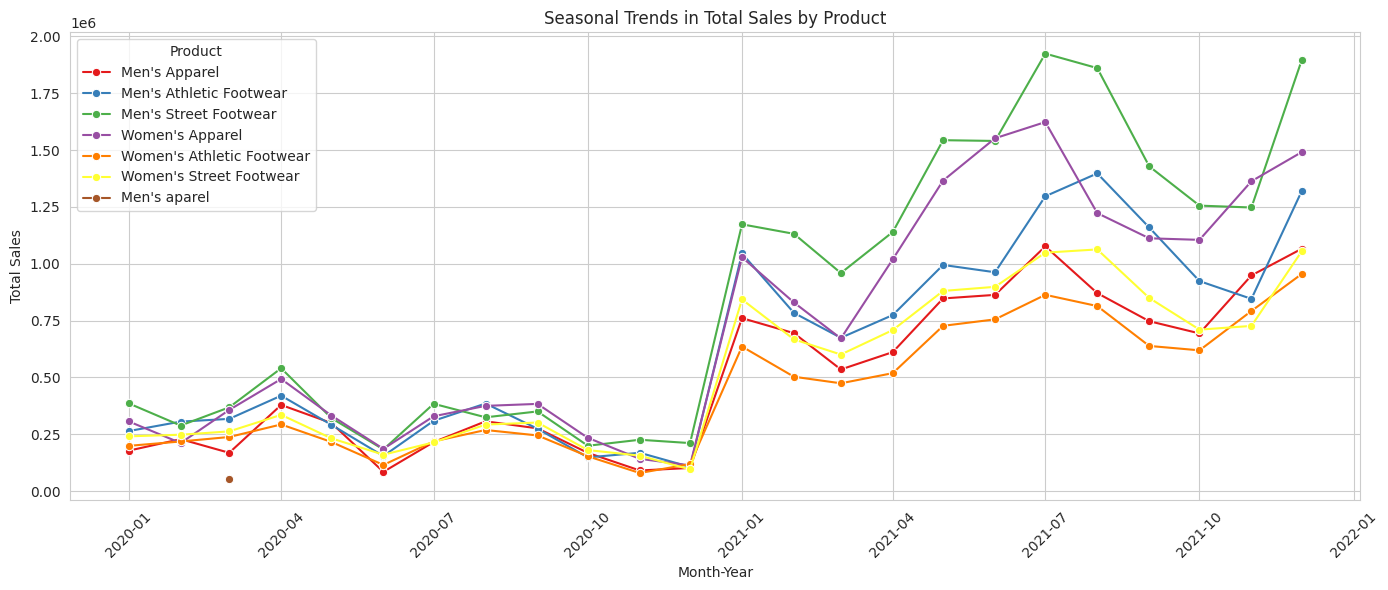

In [33]:
# Are there seasonal patterns in total sales and product performance?
# Group by Month-Year and Product
monthly_product_sales = (
    df.groupby(['Month_Year', 'Product'])['Total_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Month_Year')
)

# Plot with Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_product_sales, x='Month_Year', y='Total_Sales', hue='Product', marker='o')

# Formatting
plt.title('Seasonal Trends in Total Sales by Product')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])
df['Month_Year'] = df['Invoice_Date'].dt.to_period('M').dt.to_timestamp()
# Create and export grouped monthly product sales
monthly_product_sales = (
    df.groupby(['Month_Year', 'Product'])['Total_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Month_Year')
)

monthly_product_sales.to_csv('/content/sample_data/monthly_product_sales.csv', index=False)

#  6. Efficiency - seaborn

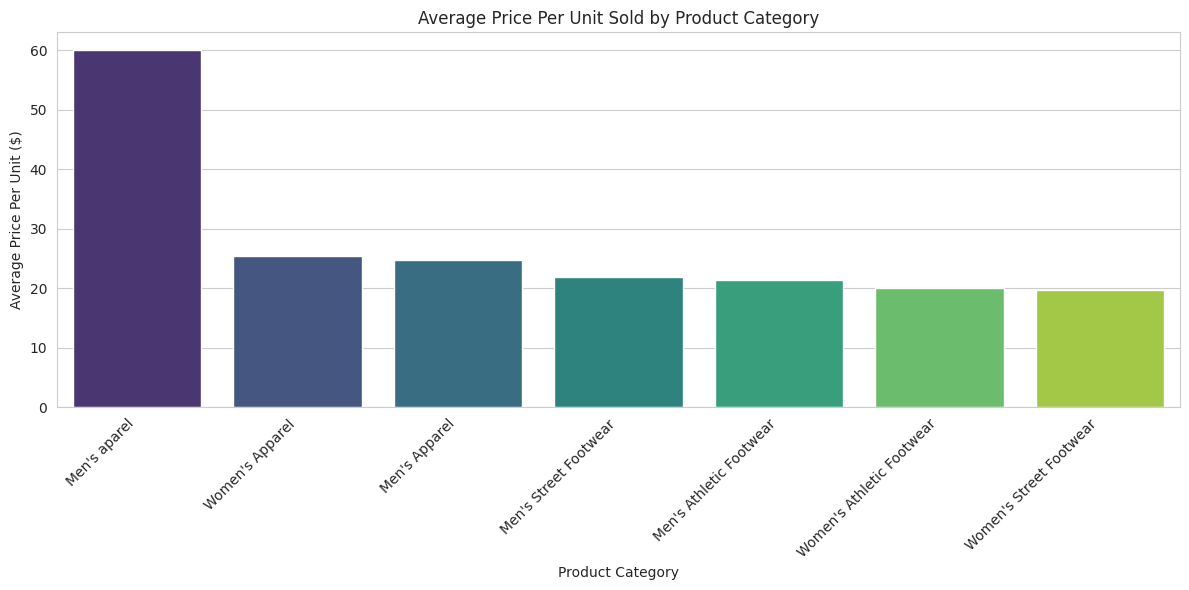

In [24]:
# What is the average price per unit sold per product category?

# Step 1: Calculate price per unit
df['Price_Per_Unit'] = df['Total_Sales'] / df['Units_Sold']

# Step 2: Group by product category
df['Avg_Price_Per_Product_Category'] = df.groupby('Product')['Price_Per_Unit'].transform('mean')

# Step 3: Create a distinct aggregated dataset for plotting
aggregated = df[['Product', 'Avg_Price_Per_Product_Category']].drop_duplicates()

# Step 4: Sort
aggregated = aggregated.sort_values(by='Avg_Price_Per_Product_Category', ascending=False)

# Step 5: Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Product',
    y='Avg_Price_Per_Product_Category',
    data=aggregated,
    hue='Product',
    palette='viridis'
)
plt.title("Average Price Per Unit Sold by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Price Per Unit ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
aggregated = df[['Product', 'Avg_Price_Per_Product_Category']].drop_duplicates()
aggregated.to_csv('/content/sample_data/avg_price_per_product.csv', index=False)

In [40]:
# Load the files 4,5,6
city_sales = pd.read_csv('/content/sample_data/city_womens_category_sales.csv')
monthly_sales = pd.read_csv('/content/sample_data/monthly_product_sales.csv')
avg_price = pd.read_csv('/content/sample_data/avg_price_per_product.csv')

# Clean whitespace from Product names
city_sales['Product'] = city_sales['Product'].str.strip()
monthly_sales['Product'] = monthly_sales['Product'].str.strip()
avg_price['Product'] = avg_price['Product'].str.strip()

# Merge 1: City-level sales with avg price per product
city_price_merged = pd.merge(city_sales, avg_price, on='Product', how='left')

# Merge 2: Bring in monthly sales (this will multiply rows if products appear in many months)
combined = pd.merge(city_price_merged, monthly_sales, on='Product', how='left')

# Save final combined CSV
combined.to_csv('topic4_5_6_combined.csv', index=False)

In [45]:
# Load the files 2

# Load both files
sales = pd.read_csv('/content/sample_data/retailer_total_sales.csv')
summary = pd.read_csv('/content/sample_data/retailer_sales_volume_profit.csv')

# Merge on Retailer
combined = pd.merge(sales, summary, on='Retailer', how='outer')

# Export combined CSV
combined.to_csv('topic2_retailer_combined.csv', index=False)

In [44]:
# Load the files 3

# Load both files
state_sales = pd.read_csv('/content/sample_data/state_total_sales.csv')
region_sales = pd.read_csv('/content/sample_data/region_retailer_sales.csv')

# If you have a mapping of states to regions (e.g. from your main DataFrame)
region_map = df[['State', 'Region']].drop_duplicates()

# Merge region info into state_sales
state_sales = pd.merge(state_sales, region_map, on='State', how='left')

# Now combine both files under a single structure
state_sales['Retailer'] = 'All'  # Placeholder
region_sales['State'] = 'All'    # Placeholder

# Make column order match
state_sales = state_sales[['Region', 'State', 'Retailer', 'Total_Sales']]
region_sales = region_sales[['Region', 'State', 'Retailer', 'Total_Sales']]

# Combine into one
combined_geo = pd.concat([state_sales, region_sales], ignore_index=True)

# Save
combined_geo.to_csv('topic3_geographic_combined.csv', index=False)